In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/imaging.csv')
df.head()

,Row ID,TIC ID,TIC,TOI,Telescope,Instrument,Filter,Image Type,Pixel Scale,PSF,Contrast,Obs Date,User,User ID,Group,Tag,Notes
0,27625,2876,NaN,TOI 3131,SOAR (4.1 m),HRCam,I: 879 (289) nm,Speckle,0.01575,0.07500,"delta 4.9 mag @ 1""",2022-02-22,ziegler,335,NaN,415924.0,NaN
1,21009,4711,NaN,TOI 3129,Gemini (8 m),'Alopeke,562: 562 (54) nm,Speckle,0.01,0.02,"delta 3.89 mag @ 0.5""",2021-06-27,furlan,5,tfopwg,98791.0,PI: Howell; contact: Steve Howell
2,27345,4711,NaN,TOI 3129,SOAR (4.1 m),HRCam,I: 879 (289) nm,Speckle,0.01575,0.06364,"delta 6.2 mag @ 1""",2022-04-15,ziegler,335,NaN,414793.0,NaN
3,21010,4711,NaN,TOI 3129,Gemini (8 m),'Alopeke,832: 832 (40) nm,Speckle,0.01,0.02,"delta 6.43 mag @ 0.5""",2021-06-27,furlan,5,tfopwg,98791.0,PI: Howell; contact: Steve Howell
4,35857,6667,NaN,NaN,Gemini (8 m),Zorro,562: 562 (54) nm,Speckle,0.01,0.02,"delta 5.32 mag @ 0.5""",2023-04-08,furlan,5,tfopwg,429350.0,PI: Howell; contact: Steve Howell


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6219 entries, 0 to 6218
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Row ID       6219 non-null   int64  
 1   TIC ID       6219 non-null   int64  
 2   TIC          297 non-null    object 
 3   TOI          2954 non-null   object 
 4   Telescope    6219 non-null   object 
 5   Instrument   6219 non-null   object 
 6   Filter       6219 non-null   object 
 7   Image Type   5673 non-null   object 
 8   Pixel Scale  6219 non-null   object 
 9   PSF          5833 non-null   object 
 10  Contrast     5153 non-null   object 
 11  Obs Date     6219 non-null   object 
 12  User         6219 non-null   object 
 13  User ID      6219 non-null   int64  
 14  Group        3245 non-null   object 
 15  Tag          6218 non-null   float64
 16  Notes        4886 non-null   object 
dtypes: float64(1), int64(3), object(13)
memory usage: 826.1+ KB


In [7]:
# Drop irrelevant columns
df_cleaned = df.drop(columns=['Row ID', 'TIC ID', 'TOI', 'User', 'User ID', 'Notes'])

# Display first few rows to confirm changes
df_cleaned.head()


,TIC,Telescope,Instrument,Filter,Image Type,Pixel Scale,PSF,Contrast,Obs Date,Group,Tag
0,NaN,SOAR (4.1 m),HRCam,I: 879 (289) nm,Speckle,0.01575,0.07500,"delta 4.9 mag @ 1""",2022-02-22,NaN,415924.0
1,NaN,Gemini (8 m),'Alopeke,562: 562 (54) nm,Speckle,0.01,0.02,"delta 3.89 mag @ 0.5""",2021-06-27,tfopwg,98791.0
2,NaN,SOAR (4.1 m),HRCam,I: 879 (289) nm,Speckle,0.01575,0.06364,"delta 6.2 mag @ 1""",2022-04-15,NaN,414793.0
3,NaN,Gemini (8 m),'Alopeke,832: 832 (40) nm,Speckle,0.01,0.02,"delta 6.43 mag @ 0.5""",2021-06-27,tfopwg,98791.0
4,NaN,Gemini (8 m),Zorro,562: 562 (54) nm,Speckle,0.01,0.02,"delta 5.32 mag @ 0.5""",2023-04-08,tfopwg,429350.0


In [8]:
# Drop the date column
df_cleaned = df_cleaned.drop(columns=['Obs Date'])

# Verify the change
df_cleaned.head()

,TIC,Telescope,Instrument,Filter,Image Type,Pixel Scale,PSF,Contrast,Group,Tag
0,NaN,SOAR (4.1 m),HRCam,I: 879 (289) nm,Speckle,0.01575,0.07500,"delta 4.9 mag @ 1""",NaN,415924.0
1,NaN,Gemini (8 m),'Alopeke,562: 562 (54) nm,Speckle,0.01,0.02,"delta 3.89 mag @ 0.5""",tfopwg,98791.0
2,NaN,SOAR (4.1 m),HRCam,I: 879 (289) nm,Speckle,0.01575,0.06364,"delta 6.2 mag @ 1""",NaN,414793.0
3,NaN,Gemini (8 m),'Alopeke,832: 832 (40) nm,Speckle,0.01,0.02,"delta 6.43 mag @ 0.5""",tfopwg,98791.0
4,NaN,Gemini (8 m),Zorro,562: 562 (54) nm,Speckle,0.01,0.02,"delta 5.32 mag @ 0.5""",tfopwg,429350.0


In [9]:
# Find non-numeric columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)


Categorical columns: Index(['TIC', 'Telescope', 'Instrument', 'Filter', 'Image Type', 'Pixel Scale',
       'PSF', 'Contrast', 'Group'],
      dtype='object')


In [10]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding
le = LabelEncoder()

for col in categorical_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

# Verify encoding
df_cleaned.head()


,TIC,Telescope,Instrument,Filter,Image Type,Pixel Scale,PSF,Contrast,Group,Tag
0,109,51,18,42,3,12,188,277,1,415924.0
1,109,19,2,11,3,5,3,114,0,98791.0
2,109,51,18,42,3,12,144,537,1,414793.0
3,109,19,2,18,3,5,3,590,0,98791.0
4,109,19,61,11,3,5,3,351,0,429350.0


In [11]:
print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6219 entries, 0 to 6218
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIC          6219 non-null   int64  
 1   Telescope    6219 non-null   int64  
 2   Instrument   6219 non-null   int64  
 3   Filter       6219 non-null   int64  
 4   Image Type   6219 non-null   int64  
 5   Pixel Scale  6219 non-null   int64  
 6   PSF          6219 non-null   int64  
 7   Contrast     6219 non-null   int64  
 8   Group        6219 non-null   int64  
 9   Tag          6218 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 486.0 KB
None


In [12]:
# Check unique values for potential target columns
for col in df_cleaned.columns:
    print(f"{col}: {df_cleaned[col].nunique()} unique values")


TIC: 110 unique values
Telescope: 60 unique values
Instrument: 62 unique values
Filter: 106 unique values
Image Type: 5 unique values
Pixel Scale: 71 unique values
PSF: 835 unique values
Contrast: 1057 unique values
Group: 2 unique values
Tag: 4028 unique values


In [13]:
# Define features (X) and target variable (y)
X = df_cleaned.drop(columns=['Group'])  # Remove target from features
y = df_cleaned['Group']  # Target column




In [14]:
import matplotlib.pyplot as plt

# Count unique values in 'Group'
group_counts = df_cleaned['Group'].value_counts()

# Print counts
print(group_counts)


Group
0    3245
1    2974
Name: count, dtype: int64


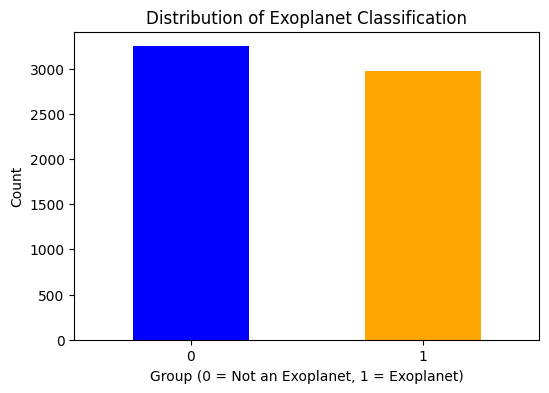

In [15]:
# Plot bar chart for class distribution
plt.figure(figsize=(6,4))
group_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel("Group (0 = Not an Exoplanet, 1 = Exoplanet)")
plt.ylabel("Count")
plt.title("Distribution of Exoplanet Classification")
plt.xticks(rotation=0)
plt.show()


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


In [17]:
# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [18]:
# Standardize the dataset (MLP performs better with scaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
import pandas as pd

# Check missing values
print(X_train.isnull().sum())
print(X_test.isnull().sum())


TIC            0
Telescope      0
Instrument     0
Filter         0
Image Type     0
Pixel Scale    0
PSF            0
Contrast       0
Tag            1
dtype: int64
TIC            0
Telescope      0
Instrument     0
Filter         0
Image Type     0
Pixel Scale    0
PSF            0
Contrast       0
Tag            0
dtype: int64


In [20]:
# Fill missing value in "Tag" column with mode (most frequent value)
X_test["Tag"] = X_test["Tag"].fillna(X_test["Tag"].mode()[0])



In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Random Forest Accuracy:", rf.score(X_test, y_test))


Random Forest Accuracy: 0.9991961414790996


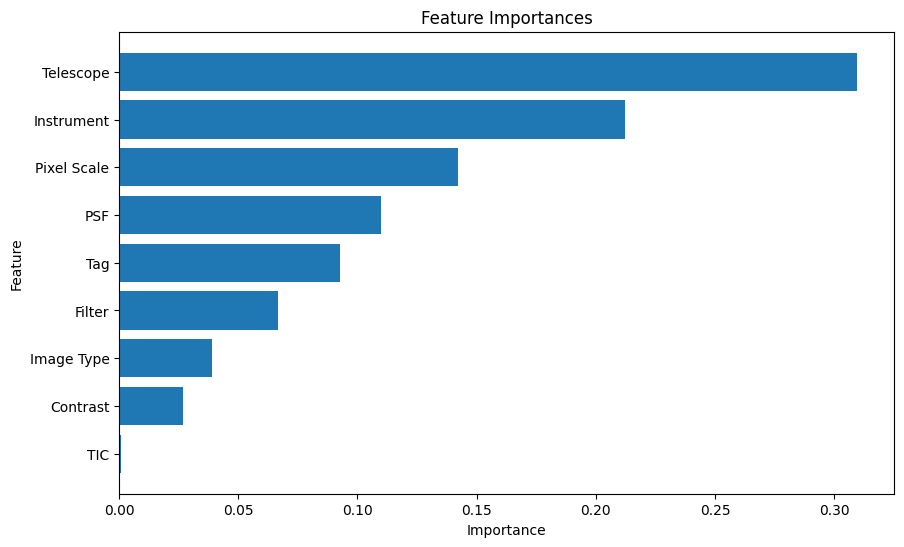

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


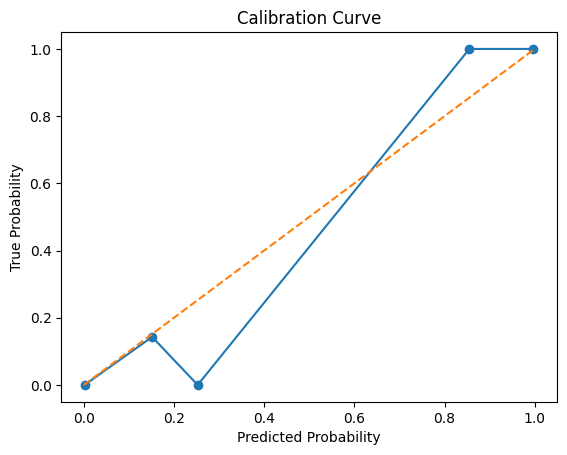

In [23]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Generate predicted probabilities
y_prob = rf.predict_proba(X_test)[:, 1]

# Compute calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

# Plot calibration curve
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.show()


In [24]:
from sklearn.calibration import CalibratedClassifierCV

# Apply Platt scaling (sigmoid calibration)
rf_calibrated = CalibratedClassifierCV(rf, method='sigmoid', cv=5)
rf_calibrated.fit(X_train, y_train)

# Predict probabilities again
y_prob_calibrated = rf_calibrated.predict_proba(X_test)[:, 1]


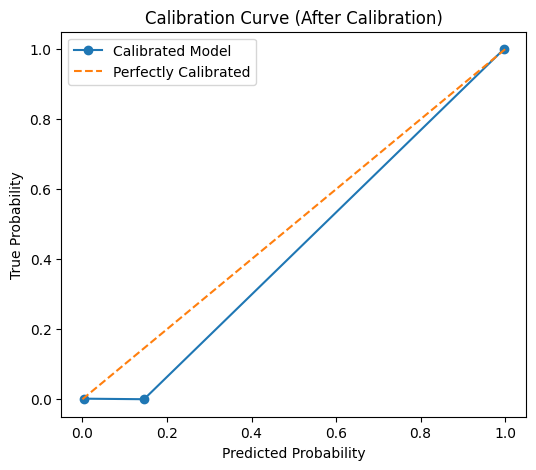

In [25]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import numpy as np

# Get calibrated probabilities
y_prob_calibrated = rf_calibrated.predict_proba(X_test)[:, 1]

# Compute calibration curve
true_prob, pred_prob = calibration_curve(y_test, y_prob_calibrated, n_bins=10)

# Plot new calibration curve
plt.figure(figsize=(6, 5))
plt.plot(pred_prob, true_prob, marker='o', label='Calibrated Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title("Calibration Curve (After Calibration)")
plt.legend()
plt.show()


In [28]:
import joblib

# Save the trained and calibrated model
joblib.dump(y_prob_calibrated,'random_forest_model.pkl')


['random_forest_model.pkl']